In [63]:
import tensorflow_datasets as tfds
import pandas as pd
import cv2
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
data = pd.read_csv(r'C:\Users\arsh0\OneDrive\Documents\MachineLearning\MusicTragedy\Data\features_30_sec.csv')
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [65]:
data.shape

(1000, 60)

In [66]:
def accuracy(y_test, y_pred):
    tCounter = 0
    fCounter = 0
    for i in range(len(y_pred)):
        if(y_pred[i] == y_test[i]):
            tCounter += 1
        else:
            fCounter += 1
    print(tCounter/(tCounter + fCounter))

In [67]:
import numpy as np
X = data.values[:, 2:59]
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = data.values[:, 59]
le = LabelEncoder()
Y = le.fit_transform(Y)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import numpy as np
dtree = DecisionTreeClassifier()
xgb = XGBClassifier(learning_rate = 0.34)
rforest = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.85      0.85      0.85        20
           2       0.58      0.37      0.45        19
           3       0.54      0.52      0.53        25
           4       0.57      0.57      0.57        21
           5       0.55      0.75      0.63        16
           6       0.68      0.76      0.72        17
           7       0.68      0.60      0.64        25
           8       0.40      0.33      0.36        18
           9       0.33      0.38      0.35        24

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.56      0.56       200



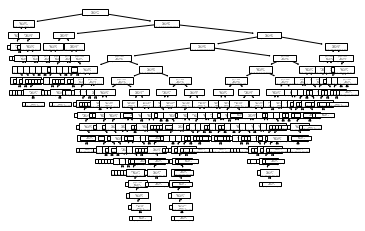

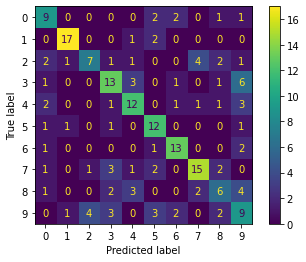

0.565


In [69]:
dtree.fit(x_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
print(classification_report(y_test, dtree.predict(x_test)))
plot_tree(dtree)
cm_display.plot()
plt.show()
print(accuracy_score(y_test, dtree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.95      0.95      0.95        20
           2       0.65      0.58      0.61        19
           3       0.56      0.72      0.63        25
           4       0.80      0.76      0.78        21
           5       0.74      0.88      0.80        16
           6       0.88      0.88      0.88        17
           7       0.94      0.68      0.79        25
           8       0.46      0.61      0.52        18
           9       0.50      0.33      0.40        24

    accuracy                           0.71       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.72      0.71      0.71       200



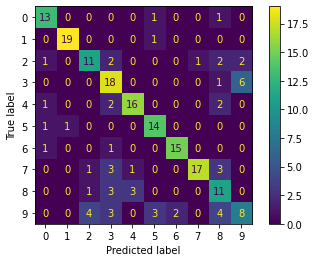

0.71


In [70]:
rforest.fit(x_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, rforest.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
print(classification_report(y_test, rforest.predict(x_test)))
cm_display.plot()
plt.show()
print(accuracy_score(y_test, rforest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.95      0.95      0.95        20
           2       0.65      0.58      0.61        19
           3       0.56      0.72      0.63        25
           4       0.80      0.76      0.78        21
           5       0.74      0.88      0.80        16
           6       0.88      0.88      0.88        17
           7       0.94      0.68      0.79        25
           8       0.46      0.61      0.52        18
           9       0.50      0.33      0.40        24

    accuracy                           0.71       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.72      0.71      0.71       200



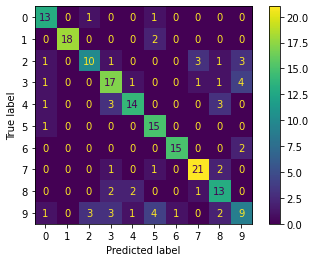

0.725


In [71]:
xgb.fit(x_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, xgb.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
print(classification_report(y_test, rforest.predict(x_test)))
cm_display.plot()
plt.show()
print(accuracy_score(y_test, xgb.predict(x_test)))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.58, 0.625, 0.65, 0.65, 0.675, 0.71, 0.705, 0.695, 0.715, 0.715, 0.72, 0.725, 0.725, 0.725, 0.72, 0.725, 0.73, 0.7, 0.75, 0.705, 0.71, 0.715, 0.695, 0.725, 0.7, 0.71, 0.705, 0.705, 0.705, 0.69, 0.7, 0.735, 0.71, 0.725, 0.71, 0.695, 0.695, 0.705, 0.7, 0.7, 0.685, 0.695, 0.7, 0.675, 0.7, 0.67, 0.685, 0.685, 0.685, 0.7, 0.69, 0.7, 0.7, 0.685, 0.69, 0.67, 0.68, 0.685, 0.71, 0.695, 0.695, 0.655, 0.69, 0.67, 0.655, 0.675, 0.685, 0.685, 0.67, 0.68, 0.675, 0.67, 0.66, 0.66, 0.665, 0.69, 0.675, 0.68, 0.68, 0.68, 0.67, 0.675, 0.7, 0.69, 0.665, 0.66, 0.685, 0.67, 0.675, 0.66, 0.695, 0.68, 0.685, 0.67, 0.685, 0.66, 0.66, 0.695, 0.685] [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0

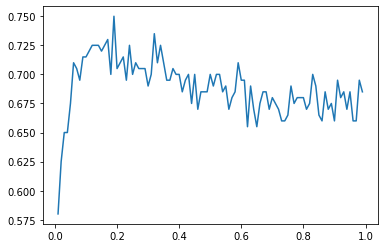

In [72]:
test_acc = []
sample_num = []
for i in range(1, 100):
    xbg = XGBClassifier(learning_rate = i/100)
    xbg.fit(x_train, y_train)
    test_acc.append(accuracy_score(y_test, xbg.predict(x_test)))
    # xgb = XGBClassifier(max_depth = i)
    # rforest = RandomForestClassifier(max_depth = i)
    sample_num.append(i/100)
    print(i)
y1 = test_acc
x = sample_num
print(y1, x)
plt.plot(x, y1)
plt.show()


[0.395, 0.435, 0.51, 0.575, 0.62, 0.665, 0.66, 0.66, 0.685] [0.43125, 0.51625, 0.63625, 0.7425, 0.825, 0.915, 0.96, 0.9825, 0.99625] [1, 2, 3, 4, 5, 6, 7, 8, 9]


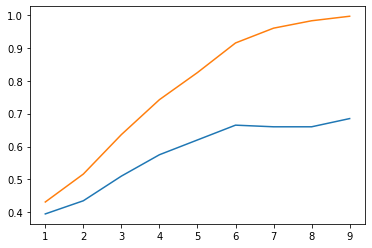

In [73]:
train_acc = []
test_acc = []
sample_num = []
for i in range(1, 10):
    rforest = RandomForestClassifier(max_depth = i)
    rforest.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, rforest.predict(x_train)))
    test_acc.append(accuracy_score(y_test, rforest.predict(x_test)))
    # xgb = XGBClassifier(max_depth = i)
    # rforest = RandomForestClassifier(max_depth = i)
    sample_num.append(i)
y1 = test_acc
x = sample_num
y2 = train_acc
print(y1, y2, x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


[0.705, 0.695, 0.69, 0.695, 0.655, 0.65, 0.645, 0.665, 0.635, 0.605, 0.635, 0.605, 0.625, 0.62, 0.61, 0.625, 0.59, 0.595, 0.595, 0.57, 0.565, 0.58, 0.56, 0.555, 0.565, 0.54, 0.545, 0.545, 0.54, 0.535, 0.53, 0.57, 0.53, 0.52, 0.52, 0.55, 0.525, 0.505, 0.535, 0.515, 0.5, 0.52, 0.53, 0.49, 0.49, 0.51, 0.505, 0.52, 0.48, 0.5, 0.51, 0.465, 0.505, 0.48, 0.49, 0.485, 0.48, 0.47, 0.48, 0.46, 0.47, 0.435, 0.44, 0.44, 0.465, 0.43, 0.455, 0.44, 0.445, 0.43, 0.42, 0.435, 0.415, 0.42, 0.435, 0.405, 0.44, 0.39, 0.385, 0.41, 0.43, 0.38, 0.395, 0.425, 0.4, 0.39, 0.38, 0.4, 0.4, 0.37, 0.365, 0.39, 0.38, 0.385, 0.39, 0.395, 0.39, 0.365, 0.375] [0.99875, 0.9975, 0.995, 0.9775, 0.9675, 0.94125, 0.92375, 0.905, 0.89375, 0.87375, 0.86125, 0.855, 0.84125, 0.825, 0.82125, 0.81, 0.79125, 0.78875, 0.77, 0.76125, 0.75125, 0.74875, 0.7425, 0.73875, 0.7225, 0.72875, 0.7125, 0.7075, 0.695, 0.7, 0.68375, 0.69875, 0.68375, 0.6725, 0.66875, 0.6725, 0.6725, 0.6625, 0.6525, 0.6525, 0.6325, 0.6475, 0.63, 0.6225, 0.63125,

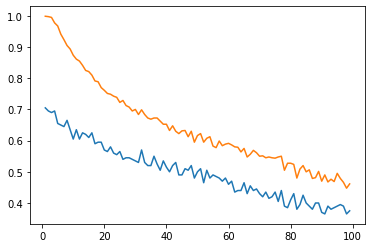

In [74]:
train_acc = []
test_acc = []
sample_num = []
for i in range(1, 100):
    rforest = RandomForestClassifier(min_samples_leaf = i)
    rforest.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, rforest.predict(x_train)))
    test_acc.append(accuracy_score(y_test, rforest.predict(x_test)))
    # xgb = XGBClassifier(max_depth = i)
    # rforest = RandomForestClassifier(max_depth = i)
    sample_num.append(i)
y1 = test_acc
x = sample_num
y2 = train_acc
print(y1, y2, x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()